#### Develop a PySpark application to implement and evaluate the ML model identified with appropriate metrics.

Importing Pyspark

In [1]:
import findspark
findspark.init('/usr/local/spark')
import pyspark

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName("ML Models").getOrCreate()

Loading the pre-processed data to build ML models.

Here we are using the final dataset which is resulted in Task 2.4

In [4]:
data = spark.read.csv('/home/hduser/Downloads/sharedfolder/final_data_merged.csv',inferSchema=True,header=True)

In [5]:
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Duration to accept offer: integer (nullable = true)
 |-- Notice period: integer (nullable = true)
 |-- Percent difference CTC: double (nullable = true)
 |-- Rex in Yrs: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Offered band_E0: integer (nullable = true)
 |-- Offered band_E1: integer (nullable = true)
 |-- Offered band_E2: integer (nullable = true)
 |-- Offered band_E3: integer (nullable = true)
 |-- Gender_Female: integer (nullable = true)
 |-- Gender_Male: integer (nullable = true)
 |-- Candidate Source_Agency: integer (nullable = true)
 |-- Candidate Source_Direct: integer (nullable = true)
 |-- Candidate Source_Employee Referral: integer (nullable = true)
 |-- Location_Ahmedabad: integer (nullable = true)
 |-- Location_Bangalore: integer (nullable = true)
 |-- Location_Chennai: integer (nullable = true)
 |-- Location_Cochin: integer (nullable = true)
 |-- Location_Gurgaon: integer (nullable = true)
 |-- Location_

In [6]:
data =data.drop('_c0')

In [7]:
data.show(5)

+------------------------+-------------+----------------------+----------+---+---------------+---------------+---------------+---------------+-------------+-----------+-----------------------+-----------------------+----------------------------------+------------------+------------------+----------------+---------------+----------------+------------------+----------------+---------------+--------------+---------------+-------------+--------+--------+--------+-------+-------+-------+--------------+---------+-------+----------------------------+-----------------------------+------+
|Duration to accept offer|Notice period|Percent difference CTC|Rex in Yrs|Age|Offered band_E0|Offered band_E1|Offered band_E2|Offered band_E3|Gender_Female|Gender_Male|Candidate Source_Agency|Candidate Source_Direct|Candidate Source_Employee Referral|Location_Ahmedabad|Location_Bangalore|Location_Chennai|Location_Cochin|Location_Gurgaon|Location_Hyderabad|Location_Kolkata|Location_Mumbai|Location_Noida|Locatio

In [8]:
data.columns

['Duration to accept offer',
 'Notice period',
 'Percent difference CTC',
 'Rex in Yrs',
 'Age',
 'Offered band_E0',
 'Offered band_E1',
 'Offered band_E2',
 'Offered band_E3',
 'Gender_Female',
 'Gender_Male',
 'Candidate Source_Agency',
 'Candidate Source_Direct',
 'Candidate Source_Employee Referral',
 'Location_Ahmedabad',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Cochin',
 'Location_Gurgaon',
 'Location_Hyderabad',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Noida',
 'Location_Others',
 'Location_Pune',
 'LOB_AXON',
 'LOB_BFSI',
 'LOB_CSMP',
 'LOB_EAS',
 'LOB_ERS',
 'LOB_ETS',
 'LOB_Healthcare',
 'LOB_INFRA',
 'LOB_MMS',
 'Candidate relocate actual_No',
 'Candidate relocate actual_Yes',
 'Status']

In [9]:
data.printSchema()

root
 |-- Duration to accept offer: integer (nullable = true)
 |-- Notice period: integer (nullable = true)
 |-- Percent difference CTC: double (nullable = true)
 |-- Rex in Yrs: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Offered band_E0: integer (nullable = true)
 |-- Offered band_E1: integer (nullable = true)
 |-- Offered band_E2: integer (nullable = true)
 |-- Offered band_E3: integer (nullable = true)
 |-- Gender_Female: integer (nullable = true)
 |-- Gender_Male: integer (nullable = true)
 |-- Candidate Source_Agency: integer (nullable = true)
 |-- Candidate Source_Direct: integer (nullable = true)
 |-- Candidate Source_Employee Referral: integer (nullable = true)
 |-- Location_Ahmedabad: integer (nullable = true)
 |-- Location_Bangalore: integer (nullable = true)
 |-- Location_Chennai: integer (nullable = true)
 |-- Location_Cochin: integer (nullable = true)
 |-- Location_Gurgaon: integer (nullable = true)
 |-- Location_Hyderabad: integer (nullable = true)

In [10]:
data.describe

<bound method DataFrame.describe of DataFrame[Duration to accept offer: int, Notice period: int, Percent difference CTC: double, Rex in Yrs: int, Age: int, Offered band_E0: int, Offered band_E1: int, Offered band_E2: int, Offered band_E3: int, Gender_Female: int, Gender_Male: int, Candidate Source_Agency: int, Candidate Source_Direct: int, Candidate Source_Employee Referral: int, Location_Ahmedabad: int, Location_Bangalore: int, Location_Chennai: int, Location_Cochin: int, Location_Gurgaon: int, Location_Hyderabad: int, Location_Kolkata: int, Location_Mumbai: int, Location_Noida: int, Location_Others: int, Location_Pune: int, LOB_AXON: int, LOB_BFSI: int, LOB_CSMP: int, LOB_EAS: int, LOB_ERS: int, LOB_ETS: int, LOB_Healthcare: int, LOB_INFRA: int, LOB_MMS: int, Candidate relocate actual_No: int, Candidate relocate actual_Yes: int, Status: int]>

Converting the Pyspark dataframe to Pandas Dataframe

In [11]:
HRdata = data.toPandas()

In [12]:
#Checking the correlation
HRdata.corr()

,Duration to accept offer,Notice period,Percent difference CTC,Rex in Yrs,Age,Offered band_E0,Offered band_E1,Offered band_E2,Offered band_E3,Gender_Female,...,LOB_CSMP,LOB_EAS,LOB_ERS,LOB_ETS,LOB_Healthcare,LOB_INFRA,LOB_MMS,Candidate relocate actual_No,Candidate relocate actual_Yes,Status
Duration to accept offer,1.000000,0.363760,-0.009395,0.113951,0.020616,-0.089779,0.009190,0.012439,0.014916,-0.020876,...,0.000833,0.041696,0.024448,0.034108,0.017921,-0.190230,0.007018,-0.012345,0.012345,-0.065446
Notice period,0.363760,1.000000,-0.015067,0.181786,-0.005325,-0.111427,-0.087727,0.083150,0.092865,-0.037903,...,0.001632,0.032652,0.015931,0.030143,0.011063,-0.137354,0.017857,0.071970,-0.071970,-0.192119
Percent difference CTC,-0.009395,-0.015067,1.000000,0.081547,0.038254,0.004558,-0.125840,0.078861,0.105543,-0.021972,...,-0.031155,0.000875,-0.037500,0.013649,0.005455,0.096417,0.003280,-0.013596,0.013596,0.033151
Rex in Yrs,0.113951,0.181786,0.081547,1.000000,0.566797,-0.254733,-0.543745,0.434836,0.449053,-0.136407,...,-0.036525,0.109671,-0.039320,0.073062,0.008369,-0.105642,-0.012391,0.006143,-0.006143,-0.037716
Age,0.020616,-0.005325,0.038254,0.566797,1.000000,-0.245930,-0.292448,0.258975,0.263196,-0.112564,...,-0.011976,0.099160,-0.072898,0.056907,-0.006501,-0.058331,-0.023076,-0.055377,0.055377,0.046019
Offered band_E0,-0.089779,-0.111427,0.004558,-0.254733,-0.245930,1.000000,-0.198021,-0.101610,-0.037680,0.148982,...,-0.022693,-0.030999,-0.089222,-0.044709,-0.018324,0.205476,-0.006334,-0.012029,0.012029,-0.019865
Offered band_E1,0.009190,-0.087727,-0.125840,-0.543745,-0.292448,-0.198021,1.000000,-0.837646,-0.310626,0.084399,...,0.123156,-0.048310,0.211391,0.042572,0.041460,-0.395512,0.031988,0.013043,-0.013043,0.000614
Offered band_E2,0.012439,0.083150,0.078861,0.434836,0.258975,-0.101610,-0.837646,1.000000,-0.159391,-0.100929,...,-0.094899,0.063021,-0.151484,-0.031613,-0.033844,0.254972,-0.026795,0.001929,-0.001929,-0.006449
Offered band_E3,0.014916,0.092865,0.105543,0.449053,0.263196,-0.037680,-0.310626,-0.159391,1.000000,-0.075077,...,-0.055875,-0.003298,-0.085545,0.002612,-0.007976,0.191480,-0.009936,-0.023499,0.023499,0.024681
Gender_Female,-0.020876,-0.037903,-0.021972,-0.136407,-0.112564,0.148982,0.084399,-0.100929,-0.075077,1.000000,...,0.026579,-0.013253,0.001782,0.016413,-0.013582,-0.021142,0.010196,0.038149,-0.038149,0.012851


Creating a heatmap to visualize the correlation

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(HRdata.corr(),annot=True)

Creating Vectors

In [14]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['Duration to accept offer',
 'Notice period',
 'Percent difference CTC',
 'Rex in Yrs',
 'Age',
 'Offered band_E0',
 'Offered band_E1',
 'Offered band_E2',
 'Offered band_E3',
 'Gender_Female',
 'Gender_Male',
 'Candidate Source_Agency',
 'Candidate Source_Direct',
 'Candidate Source_Employee Referral',
 'Location_Ahmedabad',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Cochin',
 'Location_Gurgaon',
 'Location_Hyderabad',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Noida',
 'Location_Others',
 'Location_Pune',
 'LOB_AXON',
 'LOB_BFSI',
 'LOB_CSMP',
 'LOB_EAS',
 'LOB_ERS',
 'LOB_ETS',
 'LOB_Healthcare',
 'LOB_INFRA',
 'LOB_MMS',
 'Candidate relocate actual_No',
 'Candidate relocate actual_Yes'],outputCol='features')

In [15]:
output = assembler.transform(data)

In [16]:
output.select('features').show()

+--------------------+
|            features|
+--------------------+
|(36,[0,1,2,3,4,7,...|
|(36,[0,1,2,3,4,7,...|
|(36,[0,1,3,4,7,10...|
|(36,[0,1,3,4,7,10...|
|(36,[0,1,3,4,7,10...|
|(36,[0,1,3,4,6,10...|
|(36,[0,1,3,4,7,10...|
|(36,[0,3,4,6,9,12...|
|(36,[0,1,3,4,6,9,...|
|(36,[0,1,2,3,4,6,...|
|(36,[0,1,2,3,4,7,...|
|(36,[0,2,3,4,7,10...|
|(36,[0,1,2,3,4,7,...|
|(36,[0,1,2,3,4,7,...|
|(36,[0,1,2,3,4,8,...|
|(36,[0,1,3,4,8,10...|
|(36,[0,1,2,3,4,7,...|
|(36,[0,3,4,7,10,1...|
|(36,[0,1,2,3,4,6,...|
|(36,[0,1,2,3,4,6,...|
+--------------------+
only showing top 20 rows



In [17]:
output.show(5)

+------------------------+-------------+----------------------+----------+---+---------------+---------------+---------------+---------------+-------------+-----------+-----------------------+-----------------------+----------------------------------+------------------+------------------+----------------+---------------+----------------+------------------+----------------+---------------+--------------+---------------+-------------+--------+--------+--------+-------+-------+-------+--------------+---------+-------+----------------------------+-----------------------------+------+--------------------+
|Duration to accept offer|Notice period|Percent difference CTC|Rex in Yrs|Age|Offered band_E0|Offered band_E1|Offered band_E2|Offered band_E3|Gender_Female|Gender_Male|Candidate Source_Agency|Candidate Source_Direct|Candidate Source_Employee Referral|Location_Ahmedabad|Location_Bangalore|Location_Chennai|Location_Cochin|Location_Gurgaon|Location_Hyderabad|Location_Kolkata|Location_Mumbai|L

In [18]:
data1 = output.select("features","Status")

In [19]:
data1.show(5)

+--------------------+------+
|            features|Status|
+--------------------+------+
|(36,[0,1,2,3,4,7,...|     1|
|(36,[0,1,2,3,4,7,...|     1|
|(36,[0,1,3,4,7,10...|     1|
|(36,[0,1,3,4,7,10...|     1|
|(36,[0,1,3,4,7,10...|     1|
+--------------------+------+
only showing top 5 rows



### Train Test Split

In [20]:
train, test = data1.randomSplit([0.8,0.2], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 7203
Test Dataset Count: 1792


### Logistic Regression

In [21]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = "features", labelCol = 'Status')
lrModel = lr.fit(train)

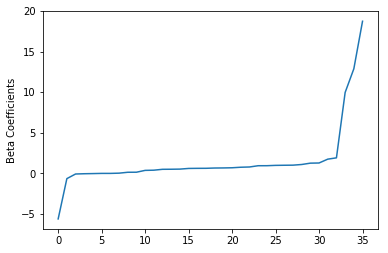

In [22]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

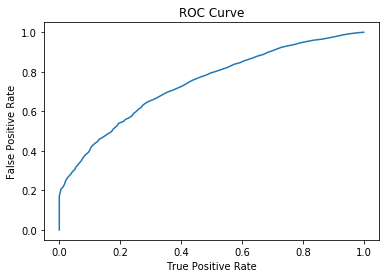

Training set areaUnderROC: 0.741401018707378


In [23]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [24]:
predictionsLR = lrModel.transform(test)
predictionsLR.select('rawPrediction', 'prediction', 'probability').show(10)

+--------------------+----------+--------------------+
|       rawPrediction|prediction|         probability|
+--------------------+----------+--------------------+
|[-1.3221566541753...|       1.0|[0.21045970620134...|
|[-1.5389167911629...|       1.0|[0.17669279664394...|
|[-1.2470558675857...|       1.0|[0.22321019828769...|
|[-0.7895130431533...|       1.0|[0.31227323805722...|
|[-1.9490732643991...|       1.0|[0.12465444443442...|
|[-17.521072319640...|       1.0|[2.45864011846905...|
|[-17.314112068581...|       1.0|[3.02396427713747...|
|[-1.2828198303353...|       1.0|[0.21707060838078...|
|[-1.0291161407665...|       1.0|[0.26325549459284...|
|[-0.4117454205419...|       1.0|[0.39849367598551...|
+--------------------+----------+--------------------+
only showing top 10 rows



In [25]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol='Status')
evaluatorM = MulticlassClassificationEvaluator(labelCol='Status')
print('Test Area Under ROC Score', evaluator.evaluate(predictionsLR))
print('Accuracy Score', evaluatorM.evaluate(predictionsLR,{evaluatorM.metricName:"accuracy"}))

Test Area Under ROC Score 0.7416101103374032
Accuracy Score 0.8231026785714286


<h3>Decision Tree Classifier</h3>


In [26]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Status', maxDepth = 6)
dtModel = dt.fit(train)
predictionsDT = dtModel.transform(test)
predictionsDT.select('rawPrediction', 'prediction', 'probability').show(10)

+-------------+----------+--------------------+
|rawPrediction|prediction|         probability|
+-------------+----------+--------------------+
| [81.0,450.0]|       1.0|[0.15254237288135...|
|   [19.0,7.0]|       0.0|[0.73076923076923...|
| [81.0,450.0]|       1.0|[0.15254237288135...|
| [66.0,138.0]|       1.0|[0.32352941176470...|
| [35.0,151.0]|       1.0|[0.18817204301075...|
| [0.0,1017.0]|       1.0|           [0.0,1.0]|
| [0.0,1017.0]|       1.0|           [0.0,1.0]|
| [35.0,151.0]|       1.0|[0.18817204301075...|
| [81.0,450.0]|       1.0|[0.15254237288135...|
|[280.0,243.0]|       0.0|[0.53537284894837...|
+-------------+----------+--------------------+
only showing top 10 rows



In [27]:
print("Feature Importance: ",dtModel.featureImportances)
print("Depth of the Decsion Tree : ",dtModel.depth)
print("The numeber of leaf nodes are : ",dtModel.numNodes)

Feature Importance:  (36,[0,1,2,3,4,5,11,22,25,32,34],[0.20306375644354702,0.2513551028239312,0.02892949188677801,0.023304391460054235,0.08163984356614153,0.01095271992055383,0.029450133267659797,0.017390182018772935,0.011888291843641827,0.08935812474849492,0.25266796202042485])
Depth of the Decsion Tree :  6
The numeber of leaf nodes are :  59


In [28]:
print('Learned classification tree model:')
print(dtModel.toDebugString)

Learned classification tree model:
DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4c57bb9a425be7972d2c) of depth 6 with 59 nodes
  If (feature 34 <= 0.0)
   Predict: 1.0
  Else (feature 34 > 0.0)
   If (feature 1 <= 30.0)
    If (feature 0 <= 70.0)
     If (feature 11 <= 0.0)
      If (feature 25 <= 0.0)
       If (feature 5 <= 0.0)
        Predict: 1.0
       Else (feature 5 > 0.0)
        Predict: 1.0
      Else (feature 25 > 0.0)
       If (feature 1 <= 0.0)
        Predict: 1.0
       Else (feature 1 > 0.0)
        Predict: 1.0
     Else (feature 11 > 0.0)
      If (feature 2 <= -6.69)
       If (feature 4 <= 28.0)
        Predict: 1.0
       Else (feature 4 > 28.0)
        Predict: 1.0
      Else (feature 2 > -6.69)
       If (feature 4 <= 33.0)
        Predict: 1.0
       Else (feature 4 > 33.0)
        Predict: 1.0
    Else (feature 0 > 70.0)
     If (feature 22 <= 0.0)
      If (feature 11 <= 0.0)
       If (feature 4 <= 25.0)
        Predict: 0.0
       Else (feat

In [29]:
print("Test Area Under ROC for Decision Tree: " + str(evaluator.evaluate(predictionsDT, {evaluator.metricName: "areaUnderROC"})))
print("Accuracy for Decision Tree: " + str(evaluatorM.evaluate(predictionsDT, {evaluatorM.metricName: "accuracy"})))

Test Area Under ROC for Decision Tree: 0.6569448649375986
Accuracy for Decision Tree: 0.8208705357142857


<h3>Random Forest Classifier</h3>

In [30]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'Status')
rfModel = rf.fit(train)
predictionsRF = rfModel.transform(test)
predictionsRF.select('rawPrediction', 'prediction', 'probability').show(10)

+--------------------+----------+--------------------+
|       rawPrediction|prediction|         probability|
+--------------------+----------+--------------------+
|[4.13908191887444...|       1.0|[0.20695409594372...|
|[5.82786426621109...|       1.0|[0.29139321331055...|
|[3.24723091929252...|       1.0|[0.16236154596462...|
|[6.94005302348007...|       1.0|[0.34700265117400...|
|[3.34856705413180...|       1.0|[0.16742835270659...|
|[0.23809523809523...|       1.0|[0.01190476190476...|
|[0.51970443349753...|       1.0|[0.02598522167487...|
|[4.70241087919709...|       1.0|[0.23512054395985...|
|[4.45934496942847...|       1.0|[0.22296724847142...|
|[7.80791803480868...|       1.0|[0.39039590174043...|
+--------------------+----------+--------------------+
only showing top 10 rows



In [31]:
print("Feature Importance : ",rfModel.featureImportances)
print("Total Number of Nodes are :",rfModel.totalNumNodes)

Feature Importance :  (36,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35],[0.07308700164326067,0.20163275793628058,0.057437286417457115,0.04579546812222466,0.02805231070783045,0.005034865543954032,0.003363697178709502,0.005721979897912026,0.0027955730517575162,0.005071554232603045,0.0016037360214334387,0.03314410105235981,0.0002374222756146653,0.04010173459709862,0.0033283744242581124,0.00786678355400973,0.0017727134882208925,0.0034763483842667016,0.0014059046207164356,0.0015885085973063981,0.01604446613321191,0.00027134610441039634,0.0034448689119168825,0.005853933318571909,0.0008918511362619678,0.0036974289562516326,0.00221173193333899,0.003118121688992137,0.0023890590899058985,0.07306437222319283,0.0007013167488318946,0.16857512835167215,0.19721825365616685])
Total Number of Nodes are : 756


In [32]:
print(rfModel.toDebugString)

RandomForestClassificationModel (uid=RandomForestClassifier_4a8d83894e9012a01125) with 20 trees
  Tree 0 (weight 1.0):
    If (feature 34 <= 0.0)
     Predict: 1.0
    Else (feature 34 > 0.0)
     If (feature 32 <= 0.0)
      If (feature 1 <= 30.0)
       If (feature 11 <= 0.0)
        If (feature 7 <= 0.0)
         Predict: 1.0
        Else (feature 7 > 0.0)
         Predict: 1.0
       Else (feature 11 > 0.0)
        If (feature 4 <= 24.0)
         Predict: 1.0
        Else (feature 4 > 24.0)
         Predict: 1.0
      Else (feature 1 > 30.0)
       If (feature 33 <= 0.0)
        If (feature 18 <= 0.0)
         Predict: 1.0
        Else (feature 18 > 0.0)
         Predict: 1.0
       Else (feature 33 > 0.0)
        Predict: 1.0
     Else (feature 32 > 0.0)
      If (feature 4 <= 23.0)
       If (feature 15 <= 0.0)
        If (feature 0 <= 36.0)
         Predict: 1.0
        Else (feature 0 > 36.0)
         Predict: 0.0
       Else (feature 15 > 0.0)
        Predict: 1.0
      Else (

In [33]:
print("Test Area Under ROC for Random Forest Classifier: " + str(evaluator.evaluate(predictionsRF, {evaluator.metricName: "areaUnderROC"})))
print("Accuracy for Random Forest Classifier: " + str(evaluatorM.evaluate(predictionsRF, {evaluatorM.metricName: "accuracy"})))

Test Area Under ROC for Random Forest Classifier: 0.7565197463585293
Accuracy for Random Forest Classifier: 0.8191964285714286


We tried different Machine Learning algorithms such as Logistic regression, Decision Tree, and Random Forest. We'll compare the accuracy of the different model and deploy the one with the highest accuracy.      
Here for the Logistic Regression we got the highest accuracy of  82.31%. 